### Project Title: Credit Card Fraud Detection
#### Done By: Nozipho Sithembiso Ndebele
---

<div style="text-align: center;">
<img src="https://www.practicalecommerce.com/wp-content/uploads/2019/02/Credit-card-fraud.jpg"alt="credit Image" width="1000"/>
</div>

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**

### Purpose
This project aims to analyze credit card transaction data to detect fraudulent activity. With the rapid increase in digital transactions, it is critical for financial institutions to identify and prevent fraud in real time. By applying preprocessing, exploratory analysis, and classification models, this project seeks to accurately identify potentially fraudulent transactions from genuine ones.

### Significance
Credit card fraud detection is a high-stakes and real-world problem that presents unique challenges and learning opportunities:

- Protecting consumers and financial institutions from monetary losses due to unauthorized transactions.

- Learning to manage imbalanced datasets, a common scenario in fraud detection.

- Developing scalable and adaptive machine learning models for anomaly detection in real-time applications.

- Evaluating performance using advanced metrics like AUPRC (Area Under the Precision-Recall Curve), rather than accuracy alone.

This project builds a solid foundation for solving classification problems, especially where class imbalance is a major concern.

### Problem Domain
The dataset represents anonymized credit card transactions made by European cardholders over a two-day period in September 2013. The binary classification task is to predict whether a transaction is fraudulent (Class = 1) or not (Class = 0), based on anonymized and transformed numerical features.

The challenge lies in the extreme imbalance of the dataset, where fraudulent transactions make up only 0.172% of the data. This makes conventional classification approaches less effective without careful handling.

### Challenges
- Severe Class Imbalance: Fraud cases are extremely rare, making up only a tiny fraction of the dataset.

- Anonymized Features: Due to confidentiality, original feature names and meanings are unavailable. PCA was applied, so feature interpretability is limited.

- Model Evaluation: Accuracy is misleading on imbalanced data. Evaluation requires metrics like AUPRC, precision, recall, and F1-score.

- Real-time Constraints: Solutions must be fast and scalable for potential real-time deployment in fraud detection systems.

### Key Questions
- Which features (even though anonymized) appear most influential in detecting fraud?

- How can we effectively handle class imbalance to improve fraud detection?

- Can sampling techniques (like under-sampling, over-sampling, SMOTE) improve model performance?

- Which models (e.g., Logistic Regression, Random Forest, XGBoost, Neural Networks) best detect rare fraudulent events?

- How do we evaluate performance in a way that reflects the rarity and importance of fraud detection?

---
<a href=#one></a>
## **Importing Packages**

### Purpose
To set up the Python environment with the necessary libraries for data manipulation, visualization, and machine learning. These libraries will facilitate data preprocessing, feature extraction, model training, and evaluation.

### Details
* Pandas: For handling and analyzing data.

* NumPy: For numerical operations.

* Matplotlib/Seaborn: For data visualization to understand trends and patterns.

* scikit-learn: For building and evaluating machine learning models.

* NLTK/Spacy: For text preprocessing and natural language processing tasks.

---

In [ ]:
# Import necessary packages  

# Data manipulation and analysis  
import pandas as pd  # Pandas for data handling  
import numpy as np  # NumPy for numerical operations  

# Data visualization  
import matplotlib.pyplot as plt  # Matplotlib for static plots  
import seaborn as sns  # Seaborn for statistical visualization  
import plotly.express as px  # Plotly for interactive plots  

# Natural Language Processing  
import nltk  # Natural Language Toolkit  
from nltk.corpus import stopwords  # Stopword removal  
from nltk.tokenize import word_tokenize  # Tokenization  
import re  # Regular expressions for text cleaning  

#Modelling
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Configure visualization settings
sns.set(style='whitegrid')  # Set the default style for Seaborn plots
plt.rcParams['figure.figsize'] = (10, 6)  # Set default figure size for Matplotlib

# Suppress warnings
import warnings  # Import the warnings module
warnings.filterwarnings('ignore')  # Ignore all warning messages


C:\Users\nozih\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


---
<a href=#two></a>
## **Data Collection and Description**
### Purpose
This section provides an overview of the dataset used for detecting fraudulent credit card transactions. Understanding its structure is crucial for designing effective preprocessing steps and modeling strategies.

### Details
Details
- Source: Kaggle – Credit Card Fraud Detection Dataset

- Collected by: Worldline and the Machine Learning Group (ULB) as part of a research collaboration.

- Timeframe: Transactions made in September 2013 across two days.

- Size: 284,807 total transactions

- Frauds: 492 fraudulent transactions (≈ 0.172%)

- Features: 30 columns (including the target)

- Anonymization: Due to confidentiality, all but two features are anonymized using PCA transformation.

### Types of Data
- `Time`	Seconds elapsed between each transaction and the first transaction
- `V1 to V28`	Principal components derived from a PCA transformation (original features undisclosed)
- `Amount`	Transaction amount
- `Class`	Target variable (0 = genuine, 1 = fraud)

---
<a href=#three></a>
## **Loading Data**
### Purpose
The purpose of this section is to load the dataset into the notebook for further manipulation and analysis. This is the first step in working with the data, and it allows us to inspect the raw data and get a sense of its structure.

### Details
In this section, we will load the dataset into a Pandas DataFrame and display the first few rows to understand what the raw data looks like. This will help in planning the next steps of data cleaning and analysis.


---

In [ ]:
# Load the dataset into a Pandas DataFrame

# The dataset is stored in a CSV file named 'creditcard.csv'
df = pd.read_csv('creditcard.csv')

In [3]:
# df is the original dataset (DataFrame), this creates a copy of it
df_copy = df.copy()

# Now 'df_copy' is an independent copy of 'df'. Changes to 'df_copy' won't affect 'df'.


In [4]:
# Display the first few rows of the dataset to get a sense of what the raw data looks like
df_copy.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Display the number of rows and columns in the dataset to understand its size
df_copy.shape

(284807, 31)

In [6]:
# Check the structure of the dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

---
<a href=#four></a>
## **Data Cleaning and Filtering**
Before analyzing the data, it is crucial to clean and filter it. This process involves handling missing values, removing outliers, correcting errors, and possibly reducing the data by filtering out irrelevant features. These steps ensure that the analysis is based on accurate and reliable data.

Details
In this section, we will:

* Check for Missing Values: Identify if there are any missing values in the dataset and handle them accordingly.
* Remove Duplicates: Ensure there are no duplicate rows that could skew the analysis.
* Correct Errors: Look for and correct any obvious data entry errors.
* Filter Data: Depending on the analysis requirements, filter the data to include only relevant records.

In [7]:
# 1. Check for missing values in the dataset

def check_missing_values(df):
    """
    Check for missing values in the dataset and display the number of missing values per column.

    Parameters:
    df (pandas.DataFrame): The dataset to check for missing values.

    Returns:
    pandas.Series: A series showing the number of missing values for each column.
    """
     # Check for missing values in the dataset and display them
    print("Missing values per column:")
    missing_values = df.isnull().sum()
    print(missing_values)
    return missing_values


In [8]:
# Assuming df is your DataFrame
missing_values = check_missing_values(df_copy)


Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


After examining the dataset, no missing values were found across any of the columns. This ensures data completeness and eliminates the need for imputation or further cleaning related to missing data.


In [ ]:
# 2. Checks for duplicate rows

def remove_duplicates(df):
    """
    Checks for duplicate rows in the dataset and removes them if any are found.

    Args:
    df (pandas.DataFrame): The dataframe to check for duplicate rows.

    Returns:
    pandas.DataFrame: The dataframe with duplicate rows removed, if any existed.
    """
    # Check for duplicate rows
    duplicate_rows = df.duplicated().sum()
    print(f"\nNumber of duplicate rows: {duplicate_rows}")
    
    # Remove duplicates if any exist
    if duplicate_rows > 0:
        df.drop_duplicates(inplace=True)
        print(f"Duplicate rows removed. Updated dataframe has {len(df)} rows.")
    else:
        print("No duplicate rows found.")
    
    return df

In [10]:
df_copy = remove_duplicates(df_copy)


Number of duplicate rows: 1081
Duplicate rows removed. Updated dataframe has 283726 rows.


Upon reviewing the dataset, 1081 duplicate rows were found and removed. This ensures that all records are unique, and no further action is required for data deduplication.


## **Saving the Cleaned Dataset**
### Purpose

This section outlines how to save the cleaned dataset for future use. Saving the dataset ensures that the data cleaning process does not need to be repeated and allows for consistent use in subsequent analyses.

### Details

We will save the cleaned dataset as a CSV file.

In [ ]:
# 3. Save the cleaned dataset to a new CSV file

def save_cleaned_dataset(df, filename='cleaned_creditcard.csv'):
    """
    Saves the cleaned dataframe to a CSV file.

    Args:
    df (pandas.DataFrame): The cleaned dataframe to save.
    filename (str): The name of the file to save the dataframe to (default is 'cleaned_domestic_violence.csv').

    Returns:
    None
    """
    # Save the cleaned dataset to a CSV file
    df.to_csv(filename, index=False)
    print(f"Cleaned dataset saved successfully as '{filename}'.")


In [12]:
save_cleaned_dataset(df_copy)


Cleaned dataset saved successfully as 'cleaned_creditcard.csv'.


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**

It is the process of analyzing datasets to summarize key features, often through visualization methods. It aims to discover patterns, spot anomalies, and formulate hypotheses for deeper insights, which informs subsequent analysis.
#### Advantages

- Helps in understanding the data before modeling.
- Provides insights that guide feature selection and engineering.
- Assists in choosing appropriate modeling techniques.
- Uncovers potential data quality issues early.

`The following methods were employed to communicate our objective:`



---


1. Dataset Overview

This helps us see ranges, means, and possible outliers (especially in Amount, Time, and anonymized components like V1–V28).

In [13]:
# Summary statistics
df_copy.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


2. Class Distribution

Imbalance Alert: We expect around 0.17% fraud. This will influence model evaluation!

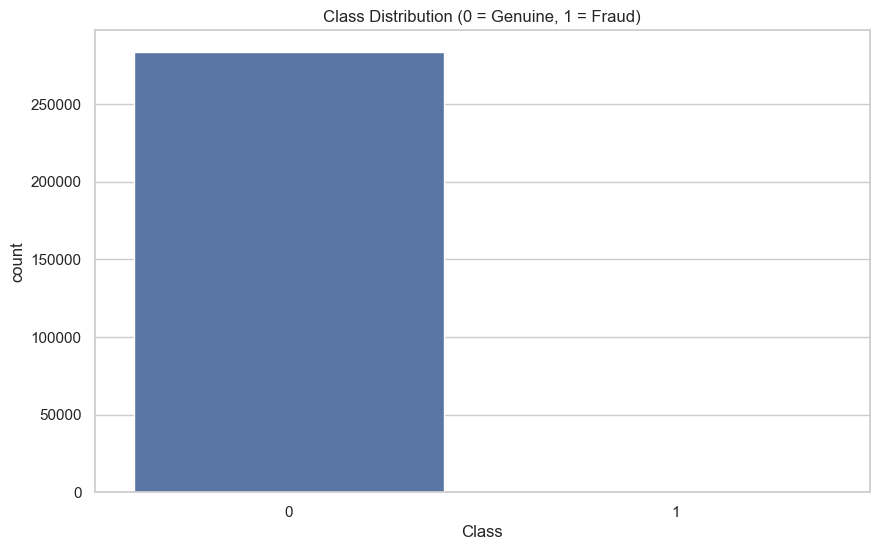

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64

In [14]:
# Plot class distribution
sns.countplot(x='Class', data=df_copy)
plt.title('Class Distribution (0 = Genuine, 1 = Fraud)')
plt.show()

# Check exact counts
df_copy['Class'].value_counts(normalize=True)


- Observation: There is a severe class imbalance — the majority of transactions are genuine (Class 0), and fraudulent transactions (Class 1) make up a very small fraction.

- Implication: Accuracy as a metric is misleading. Precision, recall, and F1-score are more appropriate.



3. Transaction Amount

Consider log transformation if skewed:

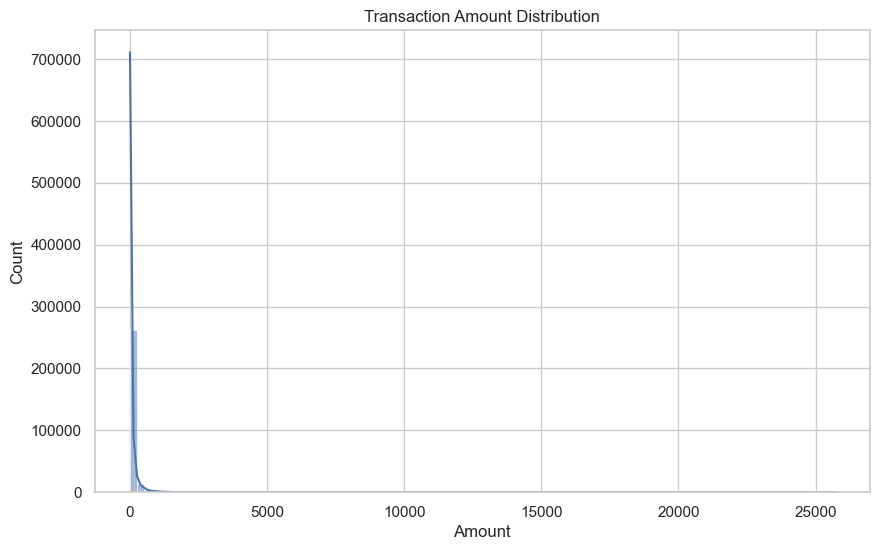

In [15]:
sns.histplot(df_copy['Amount'], bins=100, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()


- Observation: Transaction amounts are highly right-skewed. Most transactions are low-value, with a few extremely high amounts.

- Implication: Apply log transformation to normalize this skewness before modeling.

In [17]:
df_copy['Log_Amount'] = np.log1p(df_copy['Amount'])

4. Transaction Amount (Log_Amount)

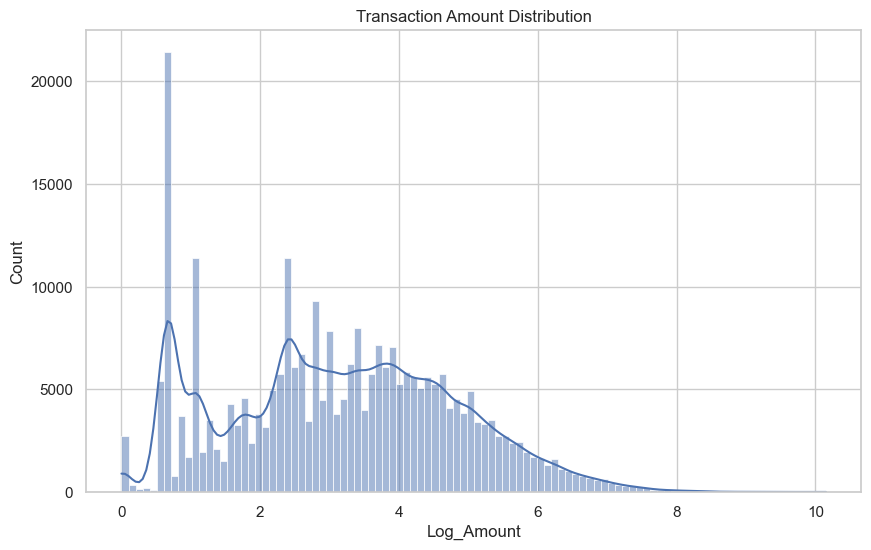

In [ ]:
sns.histplot(df_copy['Log_Amount'], bins=100, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()


- Observation: The distribution of the log-transformed amounts is more balanced and normal-looking.

- Implication: Better suited for model training as it reduces the impact of extreme outliers.

5. Time Feature

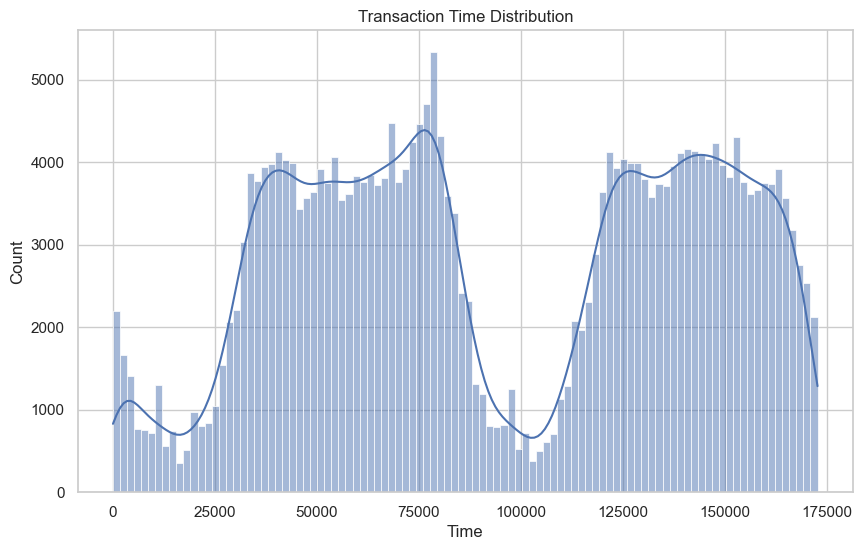

In [19]:
sns.histplot(df_copy['Time'], bins=100, kde=True)
plt.title('Transaction Time Distribution')
plt.show()


- Observation: Transactions occur continuously over the 48-hour period, but no clear cyclical trend is visible.

- Implication: Time alone might not be strongly predictive unless binned or converted into hour-of-day.

6. Time Feature (Hour)

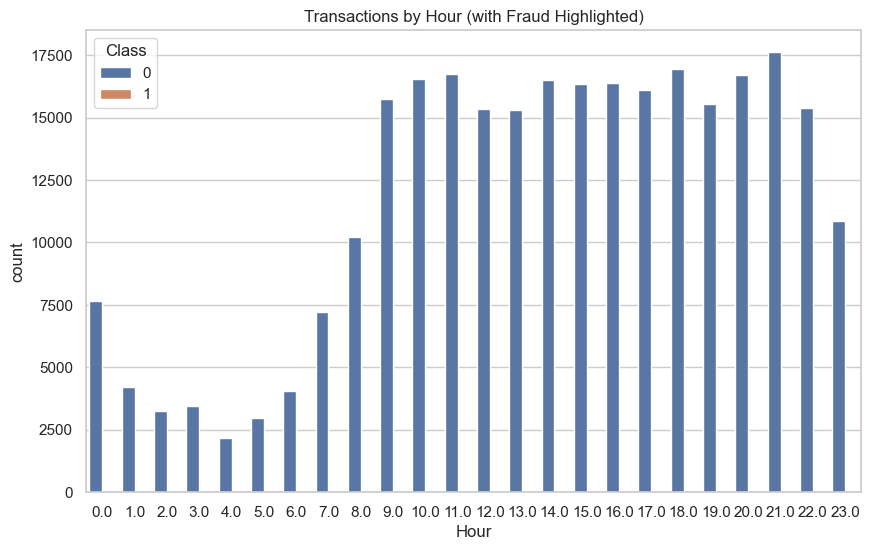

In [20]:
df_copy['Hour'] = (df_copy['Time'] // 3600) % 24
sns.countplot(data=df_copy, x='Hour', hue='Class')
plt.title('Transactions by Hour (with Fraud Highlighted)')
plt.show()


- Observation: Fraudulent transactions occur more frequently during specific hours (e.g., night or early morning).

- Implication: The "Hour" feature could add predictive value when engineered from "Time."

7. Correlation Heatmap

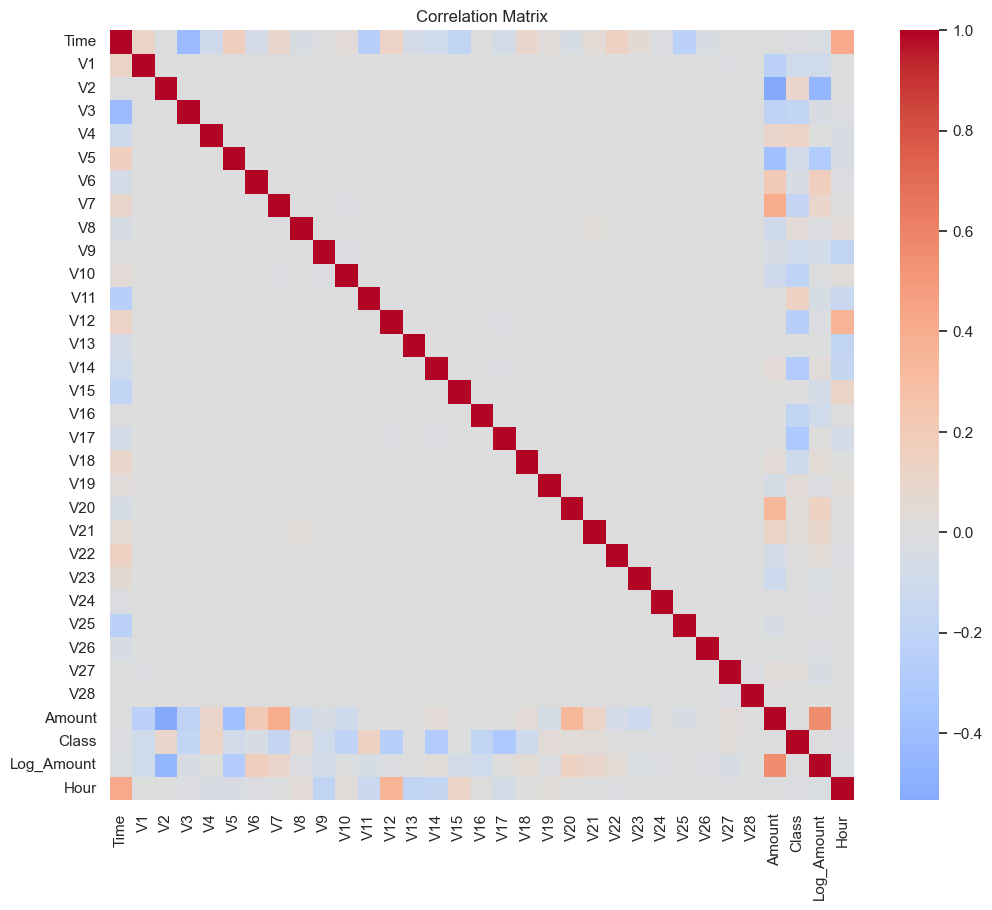

In [21]:
corr = df_copy.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


- Observation: Due to PCA transformation, most features have weak linear correlations with each other and with the target class.

- Implication: Tree-based models or non-linear classifiers may perform better in this case.

8. Top 10 most correlated features with fraud:

In [22]:
correlations = df_copy.corr()['Class'].sort_values(ascending=False)
print(correlations.head(10))  # Top positively correlated with fraud
print(correlations.tail(10))  # Top negatively correlated


Class    1.000000
V11      0.149067
V4       0.129326
V2       0.084624
V19      0.033631
V8       0.033068
V21      0.026357
V27      0.021892
V20      0.021486
V28      0.009682
Name: Class, dtype: float64
V9    -0.094021
V1    -0.094486
V18   -0.105340
V7    -0.172347
V3    -0.182322
V16   -0.187186
V10   -0.206971
V12   -0.250711
V14   -0.293375
V17   -0.313498
Name: Class, dtype: float64


- Top 10 Features Positively Correlated with Fraud (Bar Plot/Text Output)

   - Observation: Features like V11, V4, V2, and V19 show positive correlation with fraudulent transactions.

   - Implication: These features might hold the most predictive power and should be prioritized in model training.

- Top 10 Features Negatively Correlated with Fraud

   - Observation: V17, V14, V12, and V10 are most negatively correlated with fraud.

   - Implication: These features may help the model distinguish normal from abnormal behavior.


## **Modeling**

1. Feature Scaling

The Amount and Time columns are not scaled like the PCA components (V1-V28), so you should scale them (e.g., using StandardScaler or MinMaxScaler).


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_copy['Amount'] = scaler.fit_transform(df_copy[['Amount']])
df_copy['Time'] = scaler.fit_transform(df_copy[['Time']])


2. Prepare Features and Target

In [24]:
X = df_copy.drop('Class', axis=1)
y = df_copy['Class']


3. Train-Test Split

Split the data into a training set and test set.

Because of the severe imbalance, use stratify=y to maintain class proportions.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


4. Handle Imbalanced Data

Use techniques like SMOTE to balance the classes in the training set.

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


5. Train Several Models

 - Train multiple models to compare their performance:

   - Logistic Regression

   - Random Forest

   - XGBoost

   - LightGBM

   - CatBoost

   - Neural Networks (optional)

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train_resampled, y_train_resampled)


LogisticRegression()

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier()

In [ ]:
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

## **Evaluation and Validation**

Because accuracy is misleading on imbalanced data, we should focus on:

  - Precision

  - Recall

  - F1 Score

  - ROC-AUC

  - Precision-Recall Curve (AUPRC)

In [ ]:
y_pred = model_rf.predict(X_test)

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.92      0.77      0.84        95

    accuracy                           1.00     56746
   macro avg       0.96      0.88      0.92     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC: 0.8841575704985929


---
<a href=#nine></a>
## **Conclusion and Future Work**


##### Conclusion



##### Future Work

To build upon this study, future work could focus on the following areas:



---
<a href=#ten></a>
## **References**

## Additional Sections to Consider

**Contributors**: Nozipho Sithembiso Ndebele
